In [1]:
# Thanks for your interest in MCOS. This notebook has everything you will need to test and run the MCOS library. 
# For full information on how to use this library, please visit https://github.com/enjine-com/mcos
# 
# 
# Prior to running this notebook, please install the MOCS library, and matlabplot
# 
# pip install mcos
# pip install matplotlib
# 
# Thanks!

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.935829159725291e-06
            Iterations: 11
            Function evaluations: 199
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.17802254182672e-06
            Iterations: 16
            Function evaluations: 288
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.770334384199979e-06
            Iterations: 13
      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.586726288084685e-06
            Iterations: 12
            Function evaluations: 216
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.0053089597725794e-06
            Iterations: 19
            Function evaluations: 343
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5788442029438012e-06
            Iterations: 21
   

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.6551582879571428e-06
            Iterations: 11
            Function evaluations: 199
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.281230614718278e-06
            Iterations: 16
            Function evaluations: 289
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.122844778441177e-06
            Iterations: 8
     

<AxesSubplot:xlabel='optimizer'>

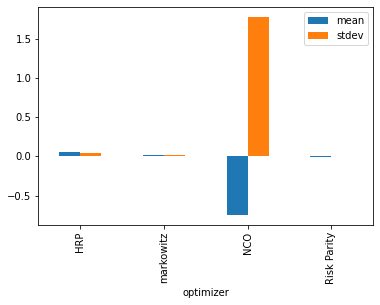

In [2]:
import numpy as np
import pandas as pd

from mcos import optimizer
from mcos import observation_simulator
from mcos import mcos
from mcos.error_estimator import ExpectedOutcomeErrorEstimator, SharpeRatioErrorEstimator, \
    VarianceErrorEstimator
from mcos.covariance_transformer import DeNoiserCovarianceTransformer, AbstractCovarianceTransformer
from mcos.observation_simulator import AbstractObservationSimulator, MuCovLedoitWolfObservationSimulator, \
MuCovObservationSimulator
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov

import warnings
warnings.filterwarnings('ignore')

#------------ Demo code for 20 American stocks------------------#

# Mean Error Estimator

# Create dataframe of price history to use for expected returns and covariance
def prices_df() -> pd.DataFrame:
    tickers = ['goog','baba', 'amzn', 'wmt', 'glpi', 'bac', 'uaa', 'shld', 'jpm', 'sbux', 'amd', 'aapl','bby',
              'ge', 'rrc', 'ma','fb']
    total_df = pd.DataFrame()
    for id in tickers:
        temp = pd.read_csv(id + '.us.txt', parse_dates=True, index_col='Date')
        temp = pd.DataFrame(temp['Close']).rename(columns={"Close":id})
        if total_df.empty:
            total_df = temp
        else:
            total_df = total_df.join(temp)

    return total_df

# Choose the number of simulations to run
num_sims = 50

# Select the optimizers that you would like to compare
op = [optimizer.HRPOptimizer(), optimizer.MarkowitzOptimizer(),optimizer.NCOOptimizer(), optimizer.RiskParityOptimizer()]

# select the metric to use for comparison
ee = ExpectedOutcomeErrorEstimator()

# select your optional covariance transformer
cov_trans = DeNoiserCovarianceTransformer()

# convert price history to expected returns and covariance matrix
mu = mean_historical_return(prices_df()).values
cov = sample_cov(prices_df()).values

# select your observational simulator
obs_sim = MuCovObservationSimulator(mu, cov, num_sims)

# Run the simulation
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.3375352935814835e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0361793228024204e-06
            Iterations: 14
            Function evaluations: 252
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0646631464333731e-05
            Iterations: 13
  

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.6757489711591402e-06
            Iterations: 18
            Function evaluations: 325
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.559958443735306e-06
            Iterations: 13
            Function evaluations: 235
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.926622247860263e-06
            Iterations: 16
    

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5570567976115514e-06
            Iterations: 21
            Function evaluations: 378
            Gradient evaluations: 21
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.559134436999065e-06
            Iterations: 19
            Function evaluations: 343
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.17059100901346e-06
            Iterations: 15
     

<AxesSubplot:xlabel='optimizer'>

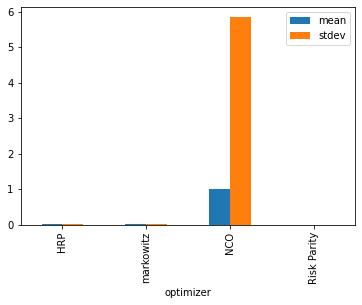

In [3]:
# Variance Error Estimator

ee = VarianceErrorEstimator()
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.371857981078186e-06
            Iterations: 27
            Function evaluations: 486
            Gradient evaluations: 27
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.1808098633103656e-06
            Iterations: 13
            Function evaluations: 235
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.052847959380596e-06
            Iterations: 18
    

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.4088588204782535e-06
            Iterations: 16
            Function evaluations: 288
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.550588865285366e-06
            Iterations: 17
            Function evaluations: 307
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8399900657085723e-06
            Iterations: 15
   

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.214480416045394e-06
            Iterations: 12
            Function evaluations: 217
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.3029181315727729e-06
            Iterations: 12
            Function evaluations: 217
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.925905830128423e-06
            Iterations: 13
            Function evaluations: 234
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0538408102290536e-06
            Iterations: 11
   

<AxesSubplot:xlabel='optimizer'>

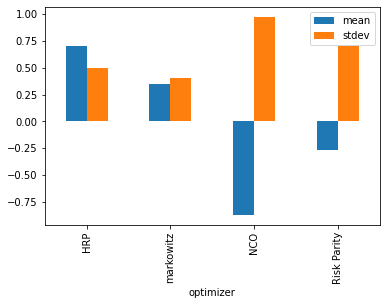

In [4]:
# Sharpe Error Estimator

ee = SharpeRatioErrorEstimator()
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.053385634238388e-06
            Iterations: 8
            Function evaluations: 409
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.177546011669533e-06
            Iterations: 6
            Function evaluations: 307
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.811987203291039e-06
            Iterations: 8
            Fu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2704628732438804e-05
            Iterations: 7
            Function evaluations: 358
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.2317543340671015e-06
            Iterations: 11
            Function evaluations: 562
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.4584216357631897e-06
            Iterations: 8
         

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.638280834068127e-07
            Iterations: 6
            Function evaluations: 307
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.981775872843936e-06
            Iterations: 13
            Function evaluations: 663
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8867025472739316e-06
            Iterations: 7
           

<AxesSubplot:xlabel='optimizer'>

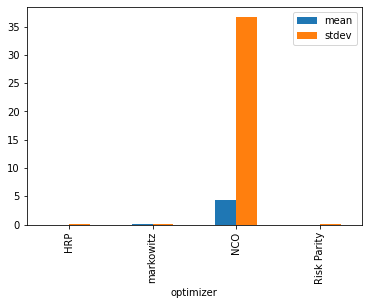

In [5]:
#------------ Demo code for 50 Chinese stocks------------------#

# Mean Error Estimator

# Create dataframe of price history to use for expected returns and covariance
def prices_df() -> pd.DataFrame:
    total_df = pd.read_csv("stocks_close.csv",index_col=0)
    return total_df

# Choose the number of simulations to run
num_sims = 50

# Select the optimizers that you would like to compare
op = [optimizer.HRPOptimizer(), optimizer.MarkowitzOptimizer(),optimizer.NCOOptimizer(), optimizer.RiskParityOptimizer()]

# select the metric to use for comparison
ee = ExpectedOutcomeErrorEstimator()
#ee = SharpeRatioErrorEstimator()

# select your optional covariance transformer
cov_trans = DeNoiserCovarianceTransformer()

# convert price history to expected returns and covariance matrix
mu = mean_historical_return(prices_df()).values
cov = sample_cov(prices_df()).values

# select your observational simulator
obs_sim = MuCovObservationSimulator(mu, cov, num_sims)

# Run the simulation
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.952689499377261e-06
            Iterations: 7
            Function evaluations: 358
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.52073071174064e-06
            Iterations: 9
            Function evaluations: 459
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5030649160597277e-06
            Iterations: 8
            Fu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.06615914842452e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8458402791975392e-06
            Iterations: 7
            Function evaluations: 358
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.815131896505211e-06
            Iterations: 10
            F

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.297054194394764e-06
            Iterations: 15
            Function evaluations: 766
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1903537394801752e-06
            Iterations: 9
            Function evaluations: 460
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.344415998622122e-06
            Iterations: 10
          

<AxesSubplot:xlabel='optimizer'>

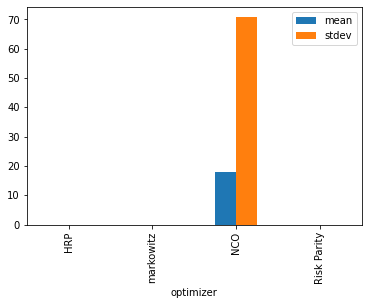

In [6]:
# Variance Error Estimator

ee = VarianceErrorEstimator()
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.7724947797965462e-06
            Iterations: 7
            Function evaluations: 358
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2045228885582499e-05
            Iterations: 10
            Function evaluations: 511
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.122288137011796e-06
            Iterations: 7
          

Optimization terminated successfully    (Exit mode 0)
            Current function value: 8.899194929297024e-07
            Iterations: 8
            Function evaluations: 409
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.130113584897958e-06
            Iterations: 6
            Function evaluations: 306
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.114420239858154e-06
            Iterations: 7
            Fu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.42772863880323e-06
            Iterations: 8
            Function evaluations: 409
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8121070694008517e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.564533452053536e-06
            Iterations: 7
            Function evaluations: 357
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.722734929510368e-06
            Iterations: 7
            Fu

<AxesSubplot:xlabel='optimizer'>

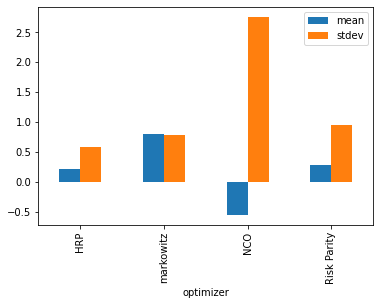

In [7]:
# Sharpe Error Estimator

ee = SharpeRatioErrorEstimator()
results = mcos.simulate_optimizations(obs_sim, num_sims, op, ee, [cov_trans])
print(results)
results.plot.bar()